Dataset
- https://www.kaggle.com/datasets/filipechavesdemacedo/counter-strike-competitive-data/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc

In [2]:
df_players = pd.read_csv('data/Competitive/match_players.csv')
df_results = pd.read_csv('data/Competitive/match_results.csv', low_memory=False)
df_stats = pd.read_csv('data/Competitive/players_stats.csv')

In [3]:
df_players.columns

Index(['Unnamed: 0', 'adr', 'assists', 'deaths', 'fkdiff', 'hs', 'kdratio',
       'kills', 'match_id', 'match_link', 'player_id', 'player_nick',
       'players_link', 'rating', 'team_name'],
      dtype='object')

In [4]:
df_players_clean = df_players.drop(["Unnamed: 0","players_link"], axis=1)
df_players_clean

,adr,assists,deaths,fkdiff,hs,kdratio,kills,match_id,match_link,player_id,player_nick,rating,team_name
0,163.2,3,10,1,10,90.0%,32,32227,/stats/matches/mapstatsid/32227/intz-vs-g3x,5736,kNgV-,2.44,g3x
1,81.0,3,6,1,5,75.0%,17,32227,/stats/matches/mapstatsid/32227/intz-vs-g3x,2532,mch,1.55,g3x
2,77.6,3,10,1,11,75.0%,16,32227,/stats/matches/mapstatsid/32227/intz-vs-g3x,7382,steel,1.41,g3x
3,77.0,2,10,-1,6,85.0%,14,32227,/stats/matches/mapstatsid/32227/intz-vs-g3x,5698,pava,1.38,g3x
4,61.2,4,12,4,4,85.0%,10,32227,/stats/matches/mapstatsid/32227/intz-vs-g3x,10563,caike,1.16,g3x
...,...,...,...,...,...,...,...,...,...,...,...,...,...
945860,105.0,7,18,0,11,66.7%,23,111478,/stats/matches/mapstatsid/111478/ago-vs-pact,8327,Furlan,1.28,AGO
945861,81.0,5,18,0,9,62.5%,13,111478,/stats/matches/mapstatsid/111478/ago-vs-pact,19044,F1KU,0.92,AGO
945862,55.5,0,17,-1,7,54.2%,15,111478,/stats/matches/mapstatsid/111478/ago-vs-pact,20289,DGL,0.78,AGO
945863,46.8,4,17,-2,5,62.5%,10,111478,/stats/matches/mapstatsid/111478/ago-vs-pact,8539,leman,0.65,AGO


In [5]:
df_results.columns

Index(['Unnamed: 0', 'data_unix', 'event_name', 'map', 'match_id',
       'match_link', 'offset', 'team_1_id', 'team_1_link', 'team_1_name',
       'team_1_score', 'team_2_id', 'team_2_link', 'team_2_name',
       'team_2_score', 'timestamp', 'hour', 'day', 'week', 'month', 'year',
       'weekday'],
      dtype='object')

In [6]:
df_results_clean = df_results.drop(["Unnamed: 0"], axis=1)
df_results_clean

,data_unix,event_name,map,match_id,match_link,offset,team_1_id,team_1_link,team_1_name,team_1_score,...,team_2_link,team_2_name,team_2_score,timestamp,hour,day,week,month,year,weekday
0,1622397600000,Elisa Invitational Summer 2021 Regionals,Overpass,121306,/stats/matches/mapstatsid/121306/case-vs-copen...,0,10894,/stats/teams/10894/case,Case,8,...,/stats/teams/7461/copenhagen-flames,Copenhagen Flames,16,2021-05-30 15:00:00,15,30,21,5,2021,6
1,1622397600000,Elisa Invitational Summer 2021 Regionals,Inferno,121296,/stats/matches/mapstatsid/121296/copenhagen-fl...,0,7461,/stats/teams/7461/copenhagen-flames,Copenhagen Flames,16,...,/stats/teams/10894/case,Case,3,2021-05-30 15:00:00,15,30,21,5,2021,6
2,1622394900000,ESEA Spring Cash Cup 6 Europe,Inferno,121298,/stats/matches/mapstatsid/121298/mad-lions-vs-...,0,8362,/stats/teams/8362/mad-lions,MAD Lions,16,...,/stats/teams/11103/19cm-gang,19CM GANG,8,2021-05-30 14:15:00,14,30,21,5,2021,6
3,1622394900000,ESEA Spring Cash Cup 6 Europe,Mirage,121292,/stats/matches/mapstatsid/121292/mad-lions-vs-...,0,8362,/stats/teams/8362/mad-lions,MAD Lions,12,...,/stats/teams/11103/19cm-gang,19CM GANG,16,2021-05-30 14:15:00,14,30,21,5,2021,6
4,1622394600000,Ghetto eGames Cup 5,Vertigo,121304,/stats/matches/mapstatsid/121304/contact-light...,0,11104,/stats/teams/11104/contact-light,Contact Light,16,...,/stats/teams/11079/trasko,Trasko,19,2021-05-30 14:10:00,14,30,21,5,2021,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94602,1348254000000,DreamHack Valencia 2012,Dust2_se,12868,/stats/matches/mapstatsid/12868/nip-vs-34united,94600,4411,/stats/teams/4411/nip,NIP,16,...,/stats/teams/4470/34united,34united,2,2012-09-21 16:00:00,16,21,38,9,2012,4
94603,1347562912000,CyberGamer Qualifier Cup #1 by Tt eSPORTS,Dust2_se,12841,/stats/matches/mapstatsid/12841/fmesports-vs-b...,94600,4445,/stats/teams/4445/fmesports,FMESPORTS,7,...,/stats/teams/4444/blight,Blight,16,2012-09-13 16:01:52,16,13,37,9,2012,3
94604,1347562800000,CyberGamer Qualifier Cup #1 by Tt eSPORTS,Inferno_se,12840,/stats/matches/mapstatsid/12840/blight-vs-fmes...,94600,4444,/stats/teams/4444/blight,Blight,16,...,/stats/teams/4445/fmesports,FMESPORTS,2,2012-09-13 16:00:00,16,13,37,9,2012,3
94605,1347562800000,Go4CS:GO Cup #6,Mirage_ce,12839,/stats/matches/mapstatsid/12839/nip-vs-prime,94600,4411,/stats/teams/4411/nip,NIP,16,...,/stats/teams/4443/prime,PRiME,1,2012-09-13 16:00:00,16,13,37,9,2012,3


In [7]:
df_stats.columns

Index(['Unnamed: 0', 'assists_round', 'deaths_round', 'dmg_round',
       'gnd_dmg_round', 'hs_percentage', 'impact', 'kast', 'kd_ratio',
       'kills_round', 'maps_played', 'player_age', 'player_country',
       'player_id', 'player_link', 'player_nick', 'rating_1', 'rounds_played',
       'save_team_round', 'saved_by_round', 'total_deaths', 'total_kills'],
      dtype='object')

In [8]:
df_stats_clean = df_stats.drop(["Unnamed: 0","player_link"], axis=1)
df_stats_clean

,assists_round,deaths_round,dmg_round,gnd_dmg_round,hs_percentage,impact,kast,kd_ratio,kills_round,maps_played,player_age,player_country,player_id,player_nick,rating_1,rounds_played,save_team_round,saved_by_round,total_deaths,total_kills
0,0.11,0.71,72.9,2.8,58.3%,0.98,67.2%,0.97,0.68,79,19,Kazakhstan,18549,laser,1.00,2093,0.10,0.09,1477,1433
1,0.12,0.70,76.7,4.1,53.0%,1.12,69.1%,1.01,0.71,189,23,Australia,16531,tensai,1.06,4857,0.11,0.11,3404,3455
2,0.17,0.66,88.8,3.8,19.8%,1.33,74.8%,1.23,0.81,5,-,Brazil,17334,Seris,1.28,131,0.14,0.11,86,106
3,0.06,0.69,54.5,3.0,31.1%,0.44,68.7%,0.79,0.54,3,31,Australia,14508,deefekt,0.76,83,0.06,0.07,57,45
4,0.14,0.74,60.7,2.8,32.4%,0.76,65.9%,0.76,0.56,5,-,Korea,11666,fAwn,0.82,132,0.14,0.13,98,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,0.17,0.81,65.6,3.2,33.3%,0.60,61.2%,0.61,0.50,4,-,Korea,11541,hide,0.73,103,0.06,0.08,83,51
14586,0.16,0.88,49.0,1.3,40.0%,0.32,53.6%,0.41,0.36,3,22,United States,17463,catez,0.47,56,0.04,0.11,49,20
14587,0.03,0.82,73.6,3.0,50.0%,0.92,52.2%,0.78,0.64,4,-,United States,15772,Vegaborne,0.83,90,0.03,0.08,74,58
14588,0.13,0.71,63.2,2.5,50.4%,0.78,63.9%,0.73,0.52,10,-,Denmark,16701,gudluc4z,0.85,255,0.12,0.12,181,133


# Dataframe

In [9]:
games_df_part1 = pd.read_csv('data/Competitive Matchmaking/esea_meta_demos.part1.csv')
games_df_part2 = pd.read_csv('data/Competitive Matchmaking/esea_meta_demos.part2.csv')

## esea games

In [10]:
games_df = pd.concat([games_df_part1, games_df_part2])
games_df = games_df[['file', 'map', 'round', 'start_seconds', 'end_seconds', 'winner_side']]

games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377629 entries, 0 to 161709
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   file           377629 non-null  object 
 1   map            377629 non-null  object 
 2   round          377629 non-null  int64  
 3   start_seconds  377589 non-null  float64
 4   end_seconds    377589 non-null  float64
 5   winner_side    377628 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 20.2+ MB


## kills

In [11]:
kills_df_part1 = pd.read_csv('data/Competitive Matchmaking/esea_master_kills_demos.part1.csv')
kills_df_part2 = pd.read_csv('data/Competitive Matchmaking/esea_master_kills_demos.part2.csv')
kills_df = pd.concat([kills_df_part1, kills_df_part2])
kills_df.info()
kills_df = kills_df[['file', 'round', 'tick', 'seconds', 'att_side', 'vic_side', 'wp', 'wp_type']]

kills_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2742646 entries, 0 to 1173168
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   tick             int64  
 3   seconds          float64
 4   att_team         object 
 5   vic_team         object 
 6   att_side         object 
 7   vic_side         object 
 8   wp               object 
 9   wp_type          object 
 10  ct_alive         int64  
 11  t_alive          int64  
 12  is_bomb_planted  bool   
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 274.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2742646 entries, 0 to 1173168
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   file      object 
 1   round     int64  
 2   tick      int64  
 3   seconds   float64
 4   att_side  object 
 5   vic_side  object 
 6   wp        object 
 7   wp_type   object 
dtypes: float64(1), int64(2), ob

# Damage

In [12]:
# Dataframe: damage
damage_df_part1 = pd.read_csv('data/Competitive Matchmaking/esea_master_dmg_demos.part1.csv')
damage_df_part2 = pd.read_csv('data/Competitive Matchmaking/esea_master_dmg_demos.part2.csv')
damage_df = pd.concat([damage_df_part1, damage_df_part2])
damage_df.info()
damage_df = damage_df[['file', 'round', 'tick', 'seconds', 'att_side', 'vic_side', 'wp', 'hp_dmg',
                       'att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']]

del damage_df_part1
del damage_df_part2
gc.collect()

damage_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10538182 entries, 0 to 4546084
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   tick             int64  
 3   seconds          float64
 4   att_team         object 
 5   vic_team         object 
 6   att_side         object 
 7   vic_side         object 
 8   hp_dmg           int64  
 9   arm_dmg          int64  
 10  is_bomb_planted  bool   
 11  bomb_site        object 
 12  hitbox           object 
 13  wp               object 
 14  wp_type          object 
 15  att_id           int64  
 16  att_rank         int64  
 17  vic_id           int64  
 18  vic_rank         int64  
 19  att_pos_x        float64
 20  att_pos_y        float64
 21  vic_pos_x        float64
 22  vic_pos_y        float64
dtypes: bool(1), float64(5), int64(8), object(9)
memory usage: 1.8+ GB
<class 'pandas.core.frame.DataFrame'>
Index: 10538182 entries, 0 to 45

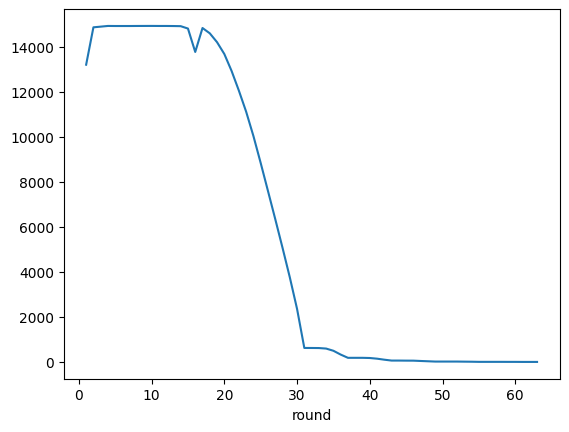

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming round_count is a pandas Series
round_count = games_df['round'].value_counts()

# Plotting
sns.lineplot(x=round_count.index, y=round_count.values)
plt.show()


<Axes: xlabel='start_seconds', ylabel='Count'>

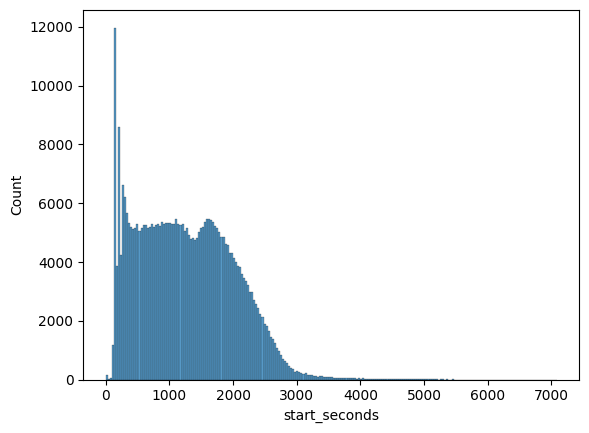

In [14]:
sns.histplot(games_df['start_seconds'])

<Axes: xlabel='end_seconds', ylabel='Count'>

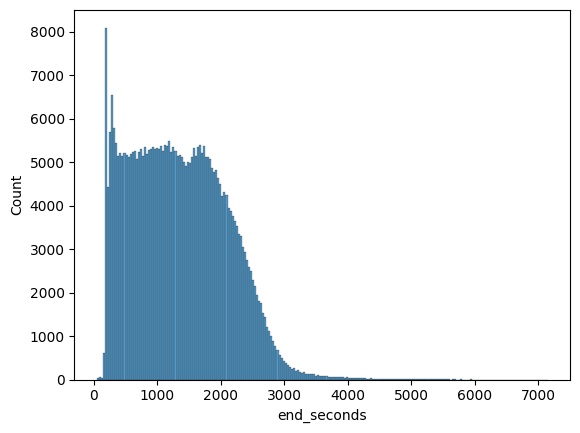

In [15]:
sns.histplot(games_df['end_seconds'])

In [16]:
games_df['winner_side'].value_counts()

winner_side
Terrorist           193614
CounterTerrorist    184014
Name: count, dtype: int64

/tmp/ipykernel_109736/3265618525.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=map_counts.index, y=map_counts, palette=colors)


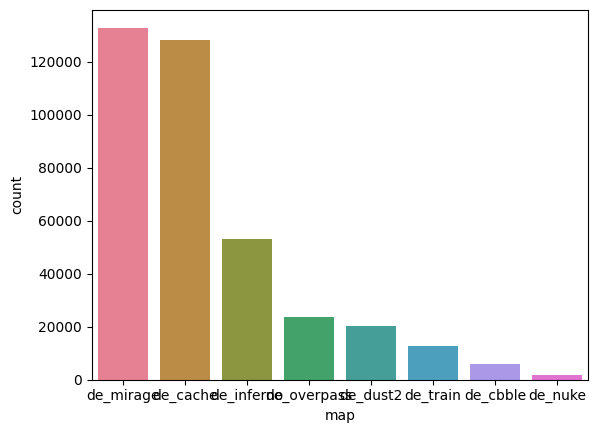

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming map_counts is a pandas Series
map_counts = games_df['map'].value_counts()

# Definindo a paleta de cores
colors = sns.color_palette("husl", len(map_counts))

# Plotting
sns.barplot(x=map_counts.index, y=map_counts, palette=colors)
plt.show()


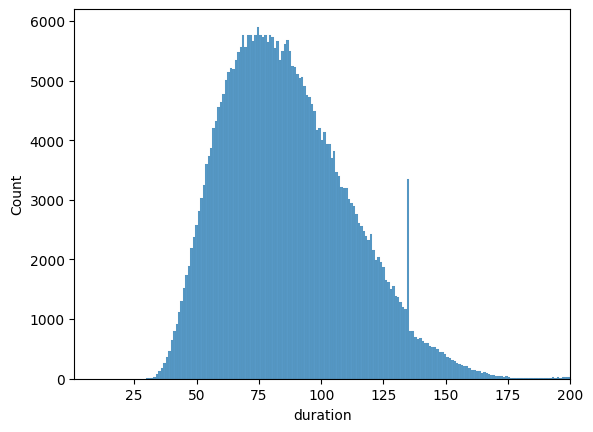

In [18]:
pd.options.mode.chained_assignment = None  # default='warn'

round_duration = games_df[['start_seconds', 'end_seconds']]
round_duration['duration'] = round_duration['end_seconds'] - round_duration['start_seconds']

fig, ax = plt.subplots()
sns.histplot(round_duration['duration'], ax=ax)
ax.set_xlim(1, 200)
plt.show()

In [19]:
kills_df['att_side'].value_counts()

att_side
CounterTerrorist    1386094
Terrorist           1356552
Name: count, dtype: int64

In [20]:
kills_df['vic_side'].value_counts()

vic_side
Terrorist           1386019
CounterTerrorist    1356627
Name: count, dtype: int64

In [21]:
kills_df['wp'].value_counts()

wp
AK47            949525
AWP             366900
M4A4            356118
Deagle          170734
USP             132761
Glock           104182
M4A1             92343
MP7              76940
CZ               73813
P250             62615
Famas            55556
UMP              42978
Mac10            41258
MP9              37237
Scout            28224
Gallil           23718
FiveSeven        21360
HE               19099
P2000            15667
P90              12489
Incendiary       11916
Swag7             6173
AUG               5947
XM1014            5766
SG556             5570
Knife             4779
Scar20            3655
Tec9              2490
Nova              2295
DualBarettas      2209
Negev             1896
Bizon             1689
Zeus              1612
G3SG1             1411
Revolver           785
SawedOff           755
M249               145
Flash               10
World                9
Molotov              9
Smoke                7
Decoy                1
Name: count, dtype: int64

<Axes: xlabel='seconds', ylabel='Count'>

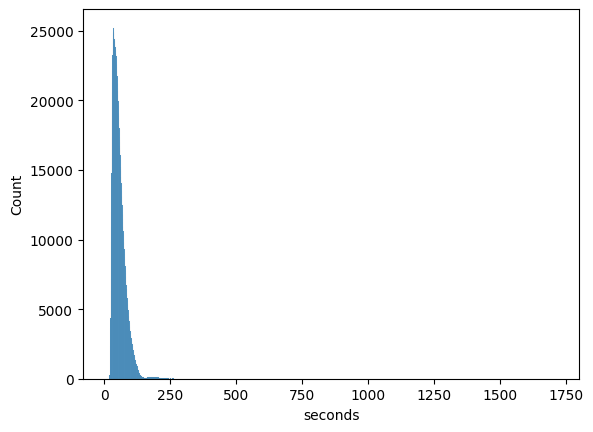

In [22]:
sns.histplot(kills_df['seconds'])

<Axes: xlabel='hp_dmg', ylabel='Count'>

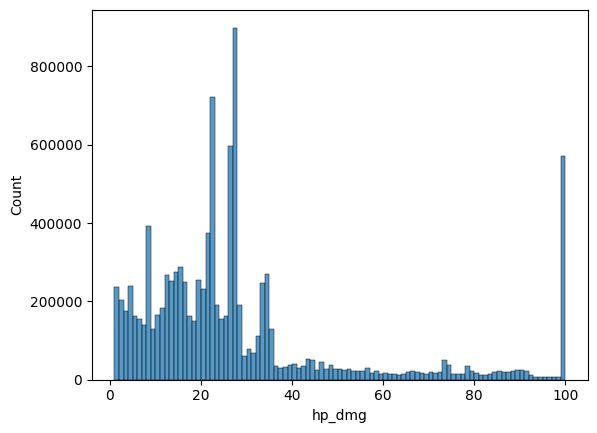

In [23]:
sns.histplot(damage_df['hp_dmg'], binwidth=1)

In [35]:
dd2_map_games = games_df.query("map == 'de_dust2'")[['file', 'map']]


In [37]:
## de_dust2
def pointx_to_resolutionx(xinput,startX=-2486,endX=2127,resX=1024):
    sizeX=endX-startX
    if startX < 0:
        xinput += startX *(-1.0)
    else:
        xinput += startX
    xoutput = float((xinput / abs(sizeX)) * resX);
    return xoutput

def pointy_to_resolutiony(yinput,startY=-1150,endY=3455,resY=1024):
    sizeY=endY-startY
    if startY < 0:
        yinput += startY *(-1.0)
    else:
        yinput += startY
    youtput = float((yinput / abs(sizeY)) * resY);
    return resY-youtput

# # Join para pegar o mapa de cada partida
dd2_map_games = games_df.query("map == 'de_dust2'")[['file', 'map']]
dd2_damage_df = damage_df.merge(dd2_map_games, on="file", how="left")
dd2_damage_df = dd2_damage_df.loc[dd2_damage_df['map'] == 'de_dust2']

# Normalizar a posicao do jogador
dd2_damage_df['attacker_mapX'] = dd2_damage_df['att_pos_x'].apply(pointx_to_resolutionx)
dd2_damage_df['attacker_mapY'] = dd2_damage_df['att_pos_y'].apply(pointy_to_resolutiony)
dd2_damage_df['victim_mapX'] = dd2_damage_df['vic_pos_x'].apply(pointx_to_resolutionx)
dd2_damage_df['victim_mapY'] = dd2_damage_df['vic_pos_y'].apply(pointy_to_resolutiony)

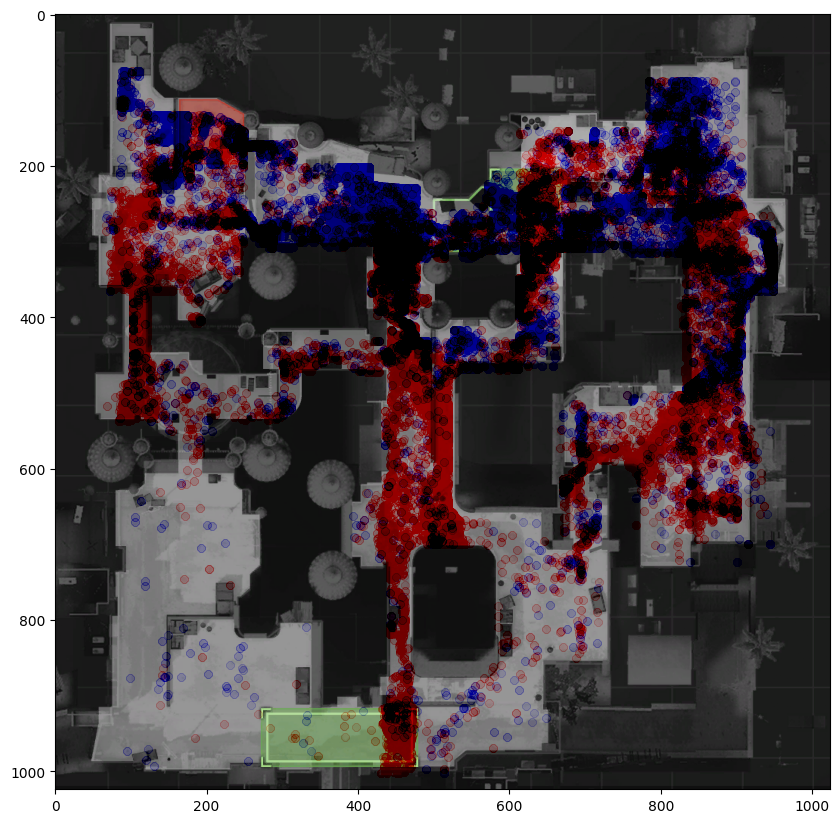

In [45]:
# Dados de CT
ct_data_awp = dd2_damage_df[(dd2_damage_df.att_side == 'CounterTerrorist') & (dd2_damage_df.wp == 'AWP')] 
im = plt.imread('data/Competitive Matchmaking/de_dust2.png')
plt.figure(figsize=(10,20))
t = plt.imshow(im)
t = plt.scatter(ct_data_awp['attacker_mapX'], ct_data_awp['attacker_mapY'],alpha=0.005,c='blue')
t = plt.scatter(ct_data_awp['victim_mapX'], ct_data_awp['victim_mapY'],alpha=0.005,c='red')

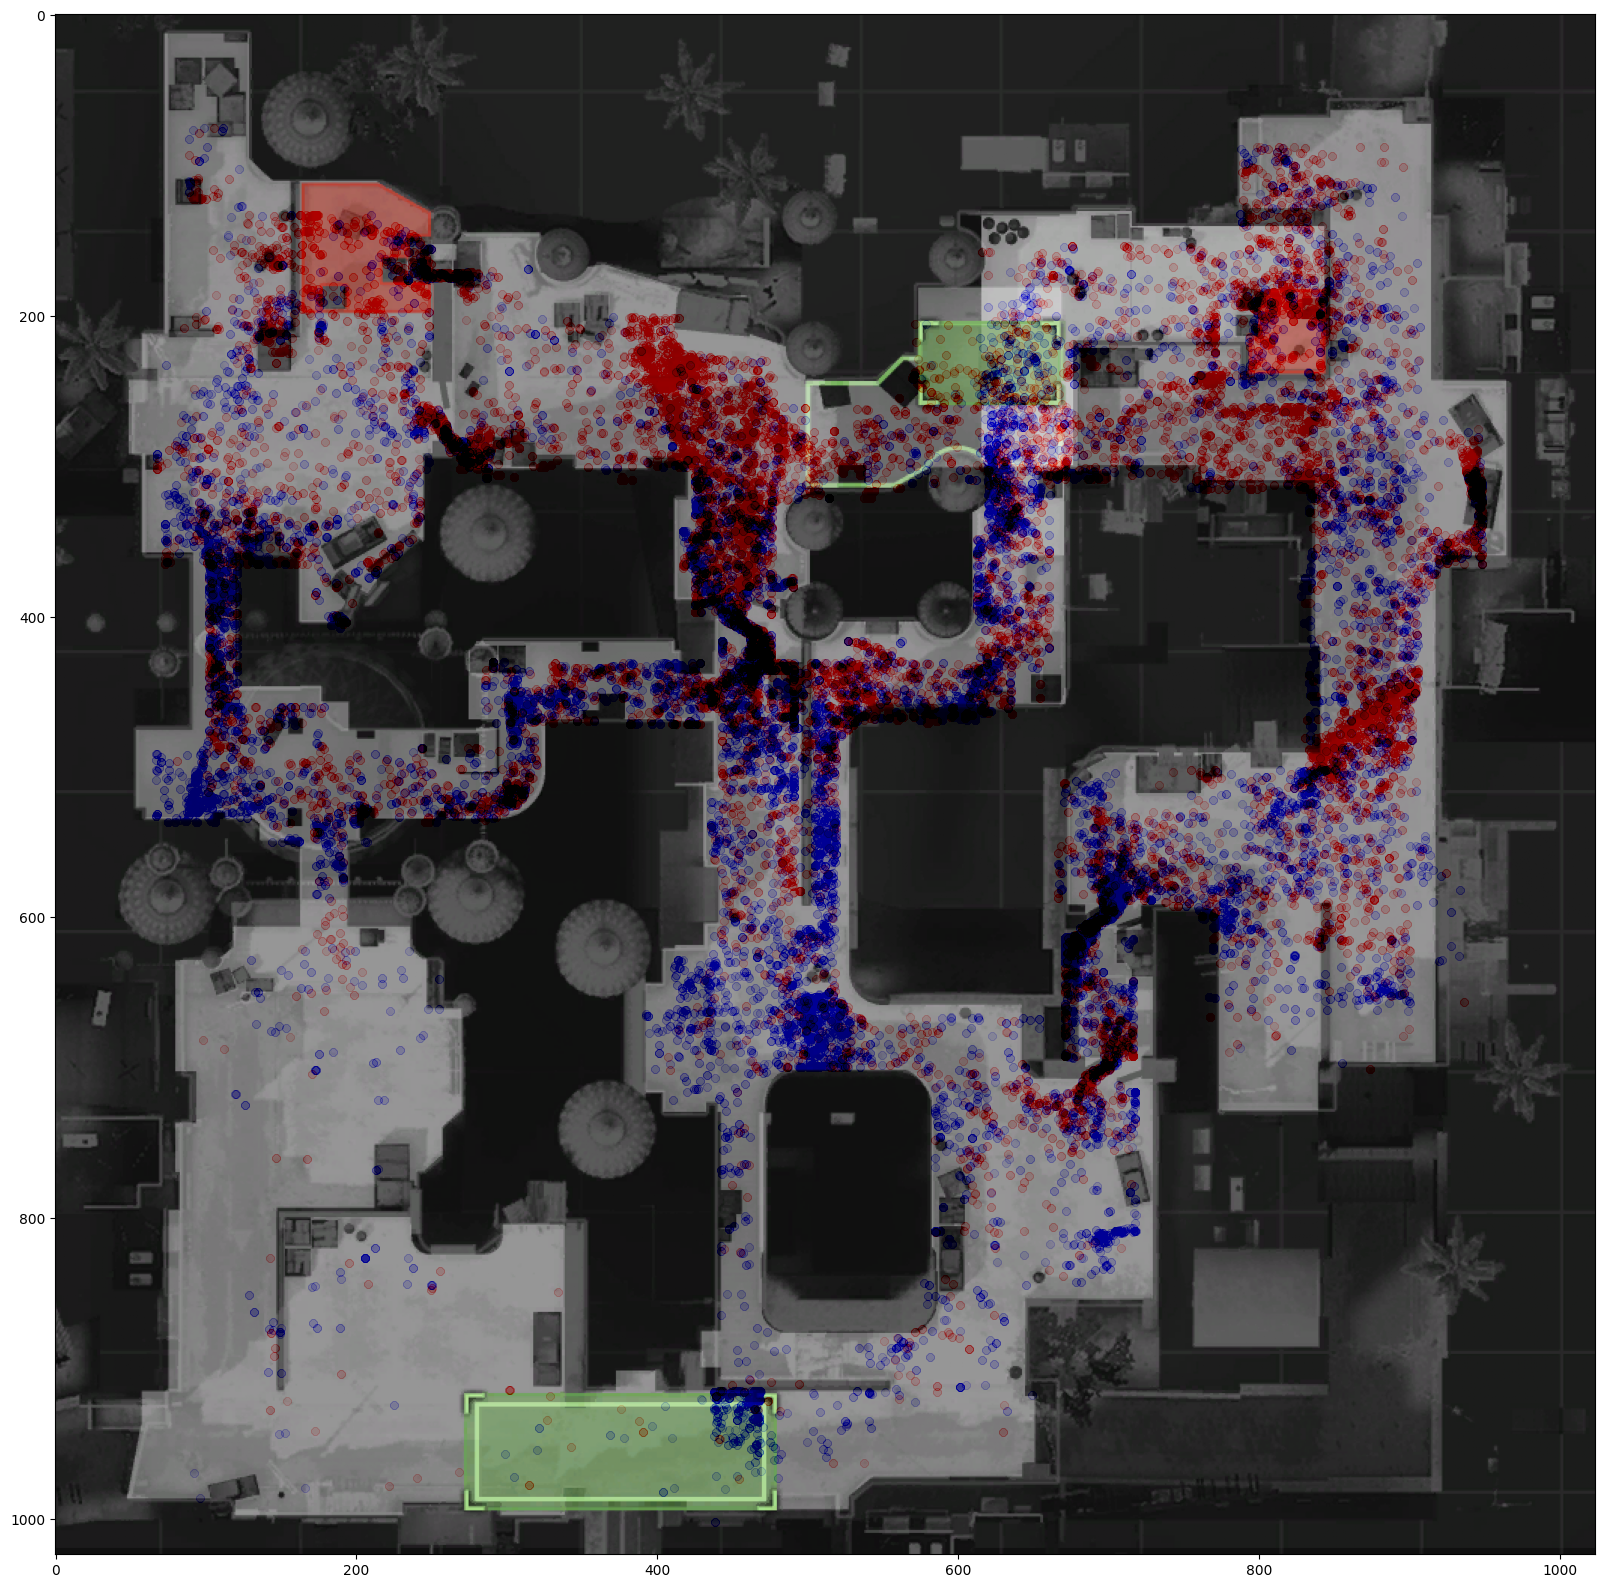

In [44]:
# Dados de TR
tr_data_awp = dd2_damage_df[(dd2_damage_df.att_side == 'Terrorist') & (dd2_damage_df.wp == 'Deagle')] 
im = plt.imread('data/Competitive Matchmaking/de_dust2.png')
plt.figure(figsize=(20,20))
t = plt.imshow(im)
t = plt.scatter(tr_data_awp['attacker_mapX'], tr_data_awp['attacker_mapY'],alpha=0.005,c='blue')
t = plt.scatter(tr_data_awp['victim_mapX'], tr_data_awp['victim_mapY'],alpha=0.005,c='red')